### Mason Manca
### CPSC 323
### Prof. Morehead
### 17 November 2022
# <center>Neural Network 3 </center>

In [108]:
# Cell for importing python modules/libraries
import os 
import time as tm
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense 
from keras.layers import Activation
from scipy.stats import pearsonr
import matplotlib.image as mpimg
import seaborn as sns 
import matplotlib.pyplot as plt


In [109]:
class Model():
    # Initializing variables
    def __init__(self):
        self.X_train = self.y_train = self.X_test = self.y_test = pd.DataFrame()
        self.train_time = 0
        self.model = None
        self.previous_epoch = None
    
    def split_into_sets(self):
        (self.X_train, self.y_train), (self.X_test, self.y_test) = mnist.load_data() # data set consisting of number classification images
        flattened_train = [to_categorical(self.y_train[i], num_classes=10) for i in range(len(self.y_train))] # one hot encoding
        flattened_test = [to_categorical(self.y_test[i], num_classes=10) for i in range(len(self.y_test))] 
        self.y_train = np.array(flattened_train)
        self.y_test = np.array(flattened_test)
        
    def createNetwork(self):
        train_start = time.time()
        self.model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(8, activation='sigmoid'),
        keras.layers.Dense(10, activation='softmax')
        ])

        self.model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy', 'mae', 'mse'])

        checkpoint_path = "./epoch_history/cp.ckpt"
        checkpoint_dir = os.path.dirname(checkpoint_path)
        callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

        self.model.summary()
        self.previous_epoch = self.model.fit(self.X_train, self.y_train, epochs=15, validation_split=0.2, callbacks=callback)
        train_end = time.time()
        self.train_time = train_end - train_start

    def plotting(self):
        plt.figure()
        fig, ax = plt.subplots(2,1)
        ax[0].plot(self.previous_epoch.history['loss'], color='b', label="Training Loss")
        ax[0].plot(self.previous_epoch.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
        legend = ax[0].legend(loc='best', shadow=True)

        ax[1].plot(self.previous_epoch.history['accuracy'], color='b', label="Training Accuracy")
        ax[1].plot(self.previous_epoch.history['val_accuracy'], color='r',label="Validation Accuracy")
        legend = ax[1].legend(loc='best', shadow=True)
        plt.show()

    def analysis(self):
        # Compute analytics
        train_score = self.model.evaluate(self.X_train, self.y_train, verbose=0)
        test_score = self.model.evaluate(self.X_test, self.y_test, verbose=0)

        y_pred = self.model.predict(self.X_test)
        scores = self.model.evaluate(self.X_test, self.y_test, verbose=0)


        print("Testing Accuracy:", round(test_score[1],3))
        print("Speed of Model (s): ", (round(self.train_time,4)))
        print("Mean Absolute Error: ", round(scores[1],4))
        print("Mean Squared Error: ", round(scores[2],4))

   


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 8)                 6280      
                                                                 
 dense_51 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1500/1500 [==============================] - 1s 777us/step - loss: 1.3962 - accuracy: 0.6150 - mae: 0.1396 - mse: 0.0615 - val_loss: 0.9667 - val_accuracy: 0.7498 - val_mae: 0.1099 - val_mse: 0.0436
Epoch 2/15
1500/1500 [==============================] - 1s 712us/step - loss: 0.8641 - accuracy: 0.7682 -

<Figure size 640x480 with 0 Axes>

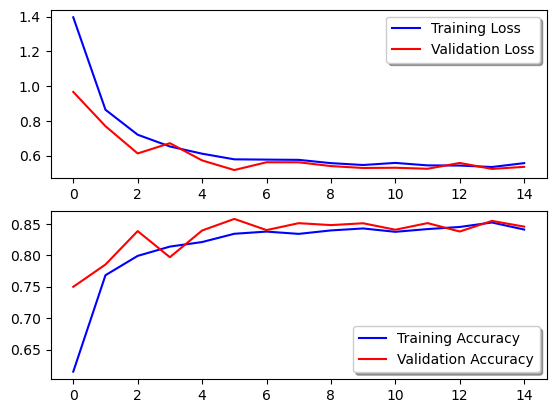

In [110]:
# Cell for everything except methods
Model = Model()
Model.split_into_sets()
Model.createNetwork()
Model.plotting()


### 

In [111]:
Model.analysis()

313/313 [==============================] - 0s 421us/step
Testing Accuracy: 0.846
Speed of Model (s):  16.8517
Mean Absolute Error:  0.8459
Mean Squared Error:  0.0487


## Analysis: 
#### My testing accuracy is a bit lower than I expected, especially compared to my previous projects with accuracy approaching 99%. I believe that this accuracy, MAE and MSE are lower than previously because it differs from my previous data set almost entirely. Not only is it multivaried classification (as opposed to binary classification) but it is not a regression model. I'm thinking that if I were to add a convolutional neural network then it would improve the accuracy and other analytics. Though, our model is decently accurate with an accuracy around 85% and a MSE of 0.05